In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Book1.csv')

In [3]:
data

,Altitude,Height,Class_var
0,2.20,1.99,Species1
1,2.04,2.19,Species1
2,1.95,2.23,Species1
3,1.79,2.22,Species1
4,1.91,2.58,Species1
5,2.31,2.53,Species2
6,2.49,2.20,Species2
7,2.94,1.88,Species2
8,2.20,2.68,Species2
9,1.97,2.93,Species2


In [4]:
X=[]
for i in range(len(data)):X.append([data['Altitude'][i],data['Height'][i]])
y=data['Class_var']

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y=le.fit_transform(y)

[-0.33333333 -0.         -0.         -0.33333333 -0.33333333]
[1. 1. 1. 1. 1.]
[0.5 1.  1.  0.5 0.5]
['Species1']


/Users/datasandwich/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


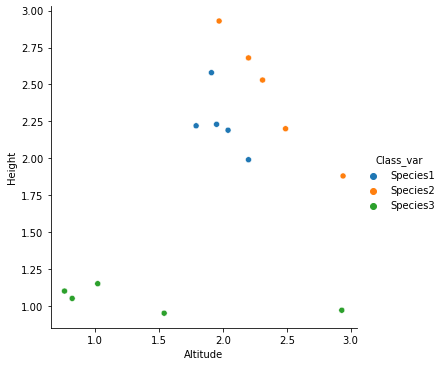

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
clf = GaussianNB()
clf.fit(X, y)
scores = cross_validate(clf, X, Y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

print(scores['test_neg_mean_squared_error'])
print(scores['train_r2'])
print(scores['test_r2'])
print(clf.predict([[2.1, 2.3]]))

sns.relplot(data['Altitude'],data['Height'],hue=y)

/Users/datasandwich/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


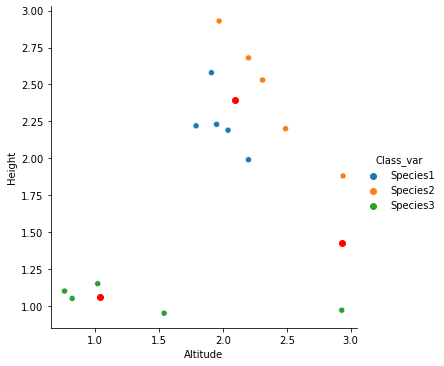

In [7]:
from sklearn.cluster import KMeans
import numpy as np
#X = np.array([[1, 2], [1, 4], [1, 0],
           #   [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[2.1, 2.3]])
clus=kmeans.cluster_centers_

sns.relplot(data['Altitude'],data['Height'],hue=y)
plt.scatter(clus[:,0],clus[:,1],c='r')